In [1]:
import pandas as pd
import numpy as np
import plotly as pt
#import sklearn as sk
import matplotlib as mpt
from sklearn.ensemble import IsolationForest

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
print(train)

           mean        sd
0      0.564877  0.231592
1     -0.118285  0.020446
2     -0.157953 -0.106749
3     -0.157953 -0.106749
4     -0.157953 -0.106242
...         ...       ...
64222 -0.062751 -0.106749
64223 -0.157953 -0.106749
64224 -0.157953 -0.106749
64225 -0.078618  0.072922
64226  1.044092  1.130232

[64227 rows x 2 columns]


In [32]:
train_model = IsolationForest(random_state=16, contamination = 0.001)

In [33]:
train_model.fit(train)


/usr/local/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"


IsolationForest(contamination=0.001, random_state=16)

In [36]:
train_model.decision_function(train)


array([0.20689105, 0.32519782, 0.53627867, ..., 0.53627867, 0.31747447,
       0.15333385])

In [6]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15,15]

In [7]:
xx, yy = np.meshgrid(np.linspace(-2, 70, 100), np.linspace(-2, 70, 100))

In [8]:
Z = train_model.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

/usr/local/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"


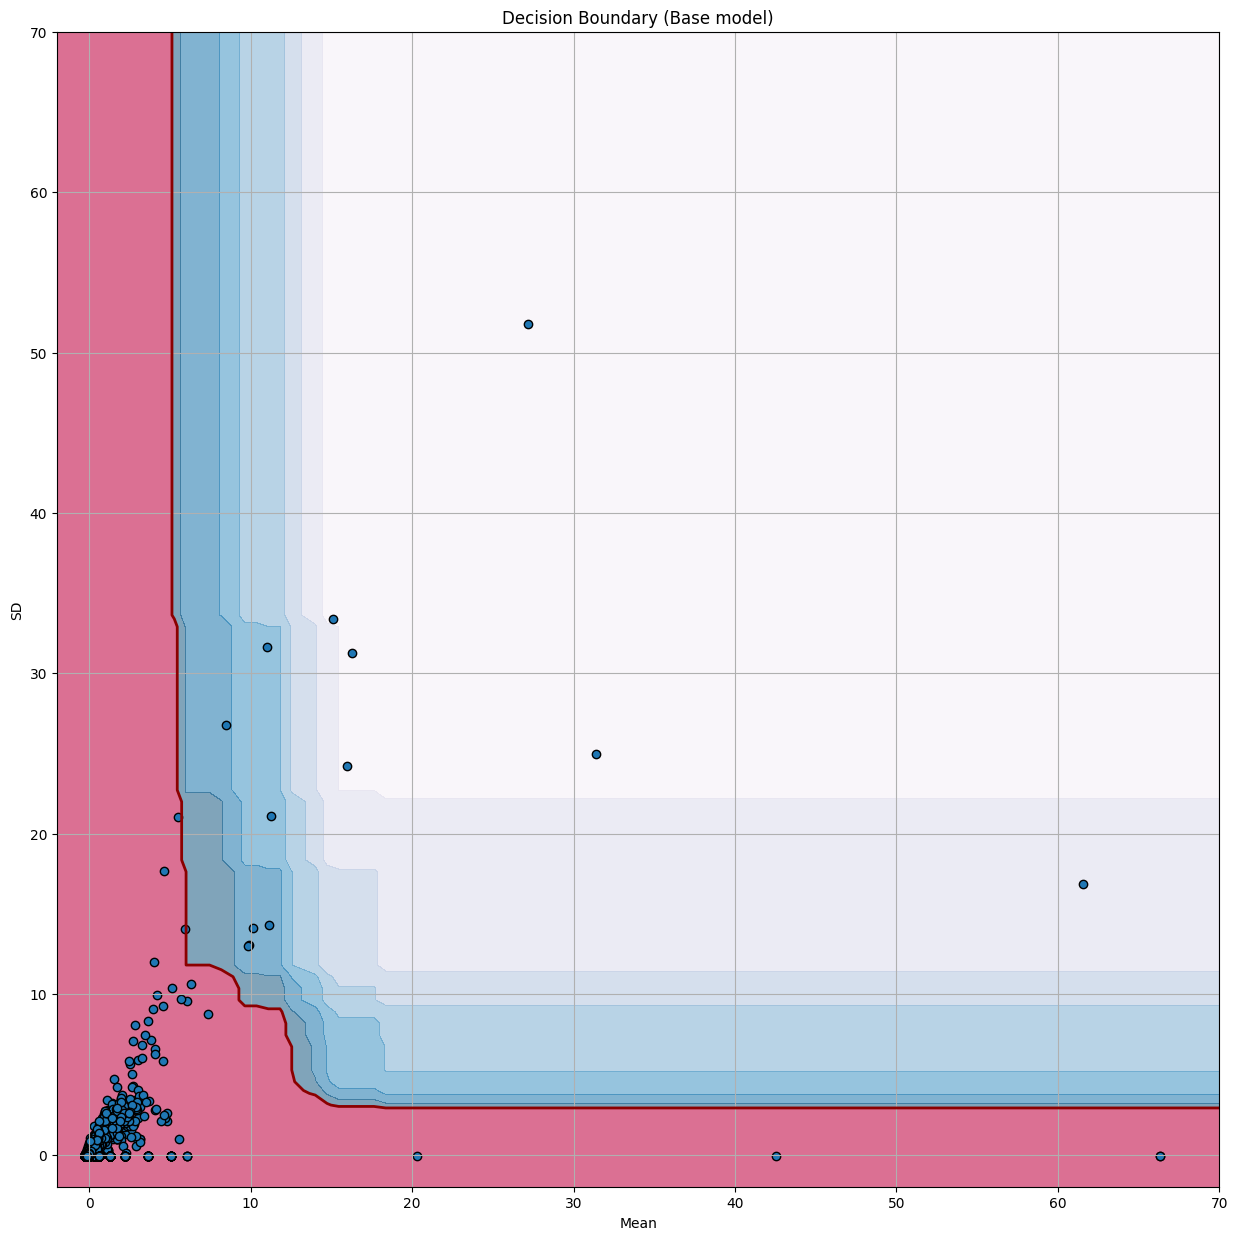

In [19]:
plt.title("Decision Boundary (Base model)")
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 8), cmap=plt.cm.PuBu, alpha=0.5)
plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='darkred')
plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors='palevioletred')
plt.scatter(train.iloc[:, 0],
            train.iloc[:, 1],
            edgecolors='k')
plt.xlabel('Mean')
plt.ylabel('SD')
plt.grid(True)
plt.show()

In [17]:
train_model.decision_function(test)

array([0.53627867, 0.53627867, 0.50785567, ..., 0.30998001, 0.50785567,
       0.53627867])

/usr/local/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"


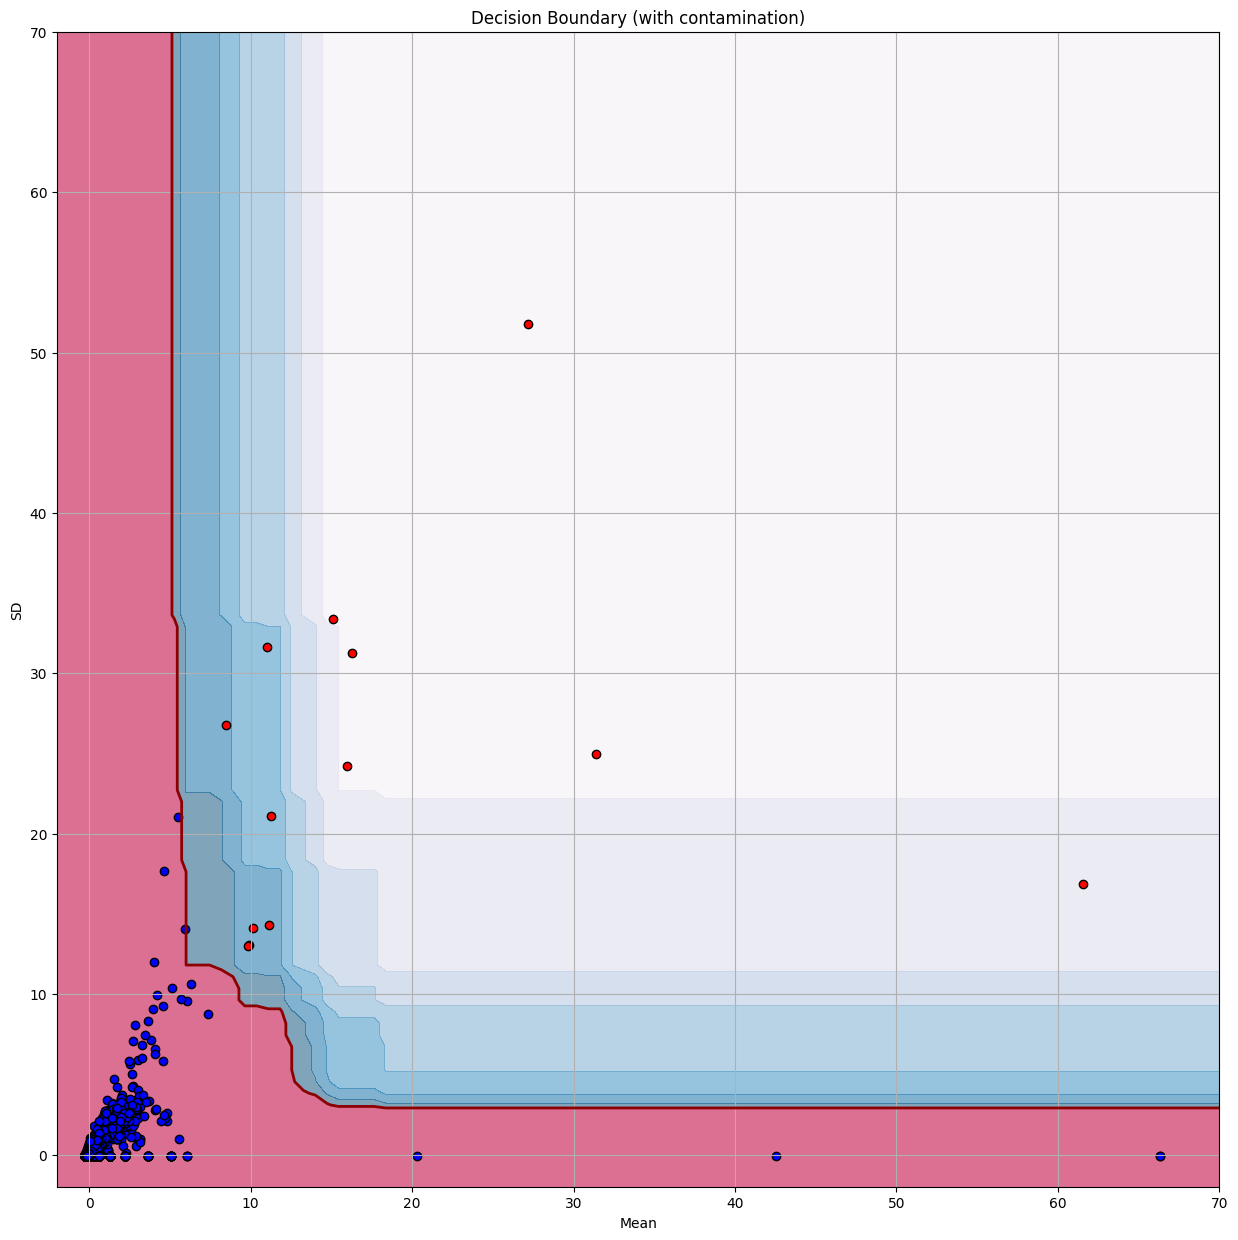

In [25]:
predictions = train_model.predict(test)
df_predictions = pd.concat([test, pd.Series(predictions)], axis=1)
df_predictions.columns = ['mean', 'sd', 'output']

plt.rcParams['figure.figsize'] = [15, 15]

xx, yy = np.meshgrid(np.linspace(-2, 70, 100), np.linspace(-2, 70, 100))
Z = train_model.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.title("Decision Boundary (with contamination)")
plt.contourf(xx, yy, Z, levels=np.linspace(
    Z.min(), 0, 8), cmap=plt.cm.PuBu, alpha=0.5)
plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='darkred')
plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors='palevioletred')
plt.scatter(df_predictions[df_predictions['output'] == 1 ].iloc[:, 0],
                 df_predictions[df_predictions['output'] == 1 ].iloc[:, 1],
                 c='blue', edgecolors='k')

plt.scatter(df_predictions[df_predictions['output'] == -1 ].iloc[:, 0],
                 df_predictions[df_predictions['output'] == -1 ].iloc[:, 1],
                 c='red', edgecolors='k')
plt.xlabel('Mean')
plt.ylabel('SD')
plt.grid(True)
plt.show()


In [37]:
from joblib import dump, load

In [38]:
dump(train_model, "model.joblib")

['model.joblib']